# Lab 2 &mdash; Fourier transform

## Submission rules:

1. The completed assignment should be prepared as s a Jupyter Notebook (.ipynb file) downloaded from your team's Google Colab. Make sure you made a copy of the notebook above and opened it via UCU email address. Submit the Jupyter Notebook (.ipynb file) to **cms**.
2. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
3. This time, you also need to provide a **work breakdown structure** estimating the efforts of each team member. Please provide it at the top of your notebook.
4. This lab requires some visualization from you; please arrange it according to best practices (appropriate axes labels, title, size/scale are a minimum).
5. The final deadline is **March 19 2024, 23:59**. Making any changes to your code after this time and date is forbidden and will be a reason for point deduction for the whole team.

#### Work breakdown:

Sofia Dyshleva: sinusoids, load and explore, summary\
Igor Ivanyshyn: analyze a song\
Bohdan Gaschuk


## Introduction
Soon, you will learn about Fourier transform, i.e., an operator that maps functions depending on space (resp. time) variables into functions depending on spatial (resp. temporal) frequency, which is widely used in spectroscopy and signal processing.  

One of the motivations to use Fourier transform comes from the study of Fourier series. In our particular case, you will transform sound (a continuous wave that is a mixture of multiple frequencies) into an arrray of pure frequencies that can be analyzed with the help of Discrete Fourier Transform. The ultimate goal is to decompose a melody into a sequence of pitches and then to notes (without any help of a trained musician's ear &mdash; that would be cheating!).

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,rfft, rfftfreq
from IPython.display import Audio
from scipy import signal
%matplotlib inline

## Sinusoids

Let's first consider a simple example. Decompose a series sin3 that is a sum of two sinusoids using the Fast Fourier transform from scipy library. FFT is simply a computationally efficient implementation of a discrete Fourier transform. What is the frequency of sin1 and sin2 signals?

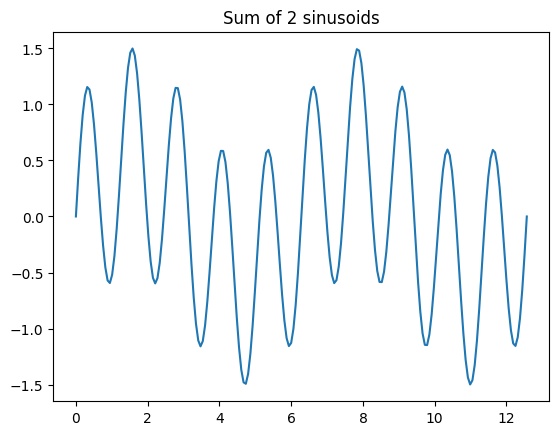

In [2]:
x = np.linspace(0, 4*np.pi, 200)
sin1 = 0.5 * np.sin(x)
sin2 = np.sin(5*x)
sin3 = sin1 + sin2
plt.plot(x, sin3)
plt.title('Sum of 2 sinusoids')
plt.show()


The frequency of a sine wave is how often the wave repeats itself.

The formula for a sine wave is :

$$y = A sin (ωt + φ)$$

Where:

$y$ is the instantaneous value of the wave.

$A$ is the amplitude of the wave.

$ω$ is the angular frequency of the wave, which is equal to $2π$ times the frequency $f$ of the wave, i.e., $ω = 2πf$

So frequency
$$f=\frac{ω}{2π}$$

So frequency of $sin1=0.5sin(x)$ is $f=\frac{1}{2π}$

Frequency of $sin2=sin(5x)$ is $f=\frac{5}{2π}$


**Apply* FFT to sin3 series to obtain frequency decomposition and plot the results.

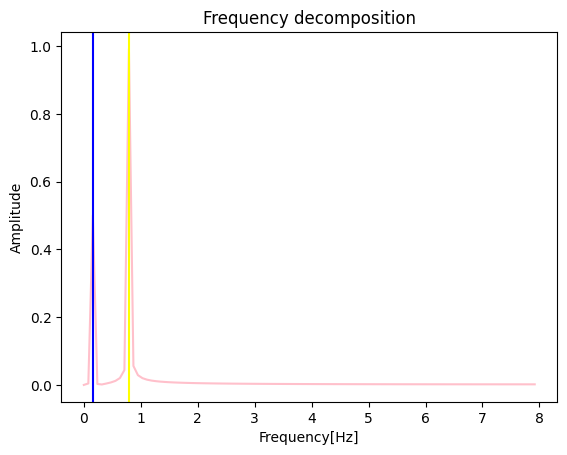

In [3]:
# Plot Frequency-domain plot here
fft = fft(sin3)
sample_spacing = x[1]-x[0]
frequence = fftfreq(len(fft), sample_spacing)
plt.plot(rfftfreq(200, d=(x[1]-x[0])), 2*np.abs(rfft(sin3))/200, color='pink')
plt.title('Frequency decomposition')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.axvline(1/(2*np.pi), color="blue")
plt.axvline(5/(2*np.pi), color="yellow")

Make sure that you got 2 spikes corresponding to the frequencies that we assigned to the sinusoids earlier. Explain how the transformation is conducted and why we can obtain two perfectly separated frequencies from a mixed signal.



---
The FFT decomposes a signal into its constituent frequencies. When we have a mixed signal like sin3 which is a sum of sin1 and sin2, the FFT is capable of identifying the individual frequencies present in the signal. This is because the FFT converts the signal from the time domain to the frequency domain, effectively separating out the different frequency components.

In the resulting frequency spectrum, we can observe distinct peaks corresponding to the frequencies present in the original signal. In this case, since sin3 is a sum of sin1 and sin2, we expect to see two spikes in the frequency spectrum corresponding to the frequencies of sin1 and sin2. This is why we can obtain two perfectly separated frequencies from a mixed signal using FFT.

---

## Working with example audio

Now, let's work with a more complex wave&mdash;sound. Any sound (audio signal) can be characterized by the following three quantities: Pitch, Quality, and Loudness.

Loudness is a physiological sensation that depends mainly on the sound wave pressure (amplitude).

The lowest note in a chord is called fundamental. It is heard predominantly due to larger intensity. Quality is determined by overtones or harmonics that add to the sound of a fundamental note.

Pitch is the frequency of a sound as perceived by human ear. A high frequency gives rise to a high pitch note and a low frequency produces a low pitch note. A pure tone is the sound of only one frequency, such as that given by a tuning fork or electronic signal generator. Naturally, music does not consist of pure tones. Depending on an instrument, technique and many other factors, sound will decay at different rates and one tone will mix with the other ones.

Thus, transcribing audio files into standard music notation (i.e., the notes) is a non-trivial task. We will focus on recognizing pitches and matching them to notes.

### Load and explore

In [4]:
# Load first sound from library examples
# Monophonic trumpet recording
trumpet_path = librosa.example('trumpet')
Audio(trumpet_path)

In [5]:
trumpet_sample, trumpet_sampling_rate = librosa.load(trumpet_path)

What is a sampling rate? What does sampling rate imply about the audio? Is it sufficient for our task (according to https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)?


---
Sample rate is the number of samples of audio carried per second (or per other unit), measured in Hertz (Hz)

example: 44.1kHz means that every second 44,100 samples were taken

A higher sampling rate implies a higher fidelity in representing the original analog signal. This is because a higher sampling rate captures more data points per unit of time, resulting in a more accurate representation of the waveform. Conversely, a lower sampling rate may not capture all the nuances of the original signal, leading to loss of detail and potentially introducing artifacts such as aliasing.

In summary, the sampling rate of an audio signal determines the fidelity and frequency range of the digital representation of the original analog signal. A higher sampling rate generally results in better audio quality and fidelity, while a lower sampling rate may lead to loss of detail and fidelity.

To determine if the sampling rate is sufficient for a given task according to the Nyquist-Shannon sampling theorem, we need to consider the highest frequency component present in the signal that we want to accurately represent.

To accurately represent a signal, the sampling frequency must be at least twice the maximum frequency present in the signal. Therefore, if we want to accurately represent frequencies up to, say, 4,000 Hz (to account for the highest notes in music), we would need a sampling rate of at least 8,000 Hz.



---

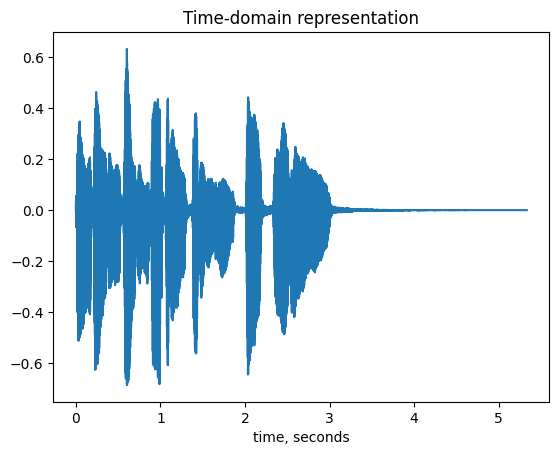

In [6]:
# Initial visualization
time = np.array(range(trumpet_sample.shape[0])) / trumpet_sampling_rate
plt.plot(time, trumpet_sample)
plt.title('Time-domain representation')
plt.xlabel('time, seconds')
plt.show()

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence. These amplitudes are not very informative as they only represent the loudness of audio recording. To better understand the audio signal, it is necessary to transform it into the frequency domain. The frequency-domain representation of a signal tells us which frequencies are present in the signal.

Decompose the trumpet samples using fft and plot the results. Observe that the frequency pattern corresponds to the pitch changes.

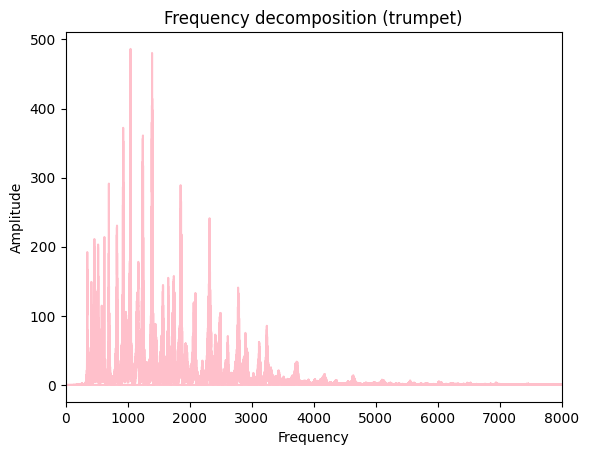

In [7]:
# FFT for trumpet
fft_trumpet=np.fft.fft(trumpet_sample) #scipy fft does not work for me((
frequency_trumpet=fftfreq(len(fft_trumpet), 1/trumpet_sampling_rate)
plt.plot(frequency_trumpet, np.abs(fft_trumpet), color='pink')
plt.xlim(0,8000)
plt.title('Frequency decomposition (trumpet)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()


## Analyzing a song

In the next task, you need to use the recording of a famous Ukrainian song (piano_melody.mp3) attached on cms. Your creativity is not limited here so any better ways to compelling visuals, more advanced algorithms on top of FFT or spectrogram, and explanations will be rewarded.     


1.   Load the recording, replay it, and plot in the time domain. To get a better view of how the notes change throughout a shorter time, choose a sample of the audio up to 5 seconds and plot it in the time domain. From here on out you will be working with this smaller 5-second sample.


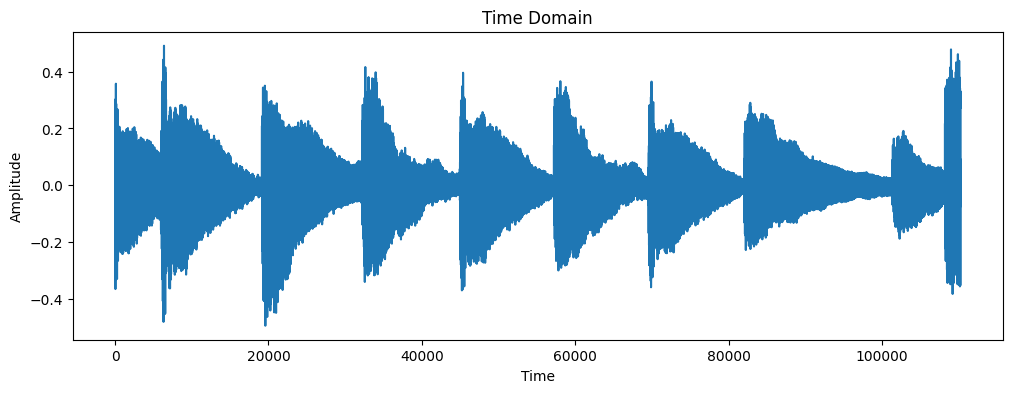

In [8]:
# Loading sound
path = "piano_melody.mp3"
samples, sampling_rate = librosa.load(path)
#Audio(path)
#Creating a 5-second sample of the audio
samples = samples[5*sampling_rate:10*sampling_rate]
#samples = samples[:40*sampling_rate]
#Audio(samples, rate=sampling_rate)
plt.figure(figsize=(12, 4))
plt.plot(samples)
plt.title("Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
Audio(samples, rate=sampling_rate)

2.   Build a spectrogram of the sample. Explain what domain the spectrogram represents us and how can it be useful.


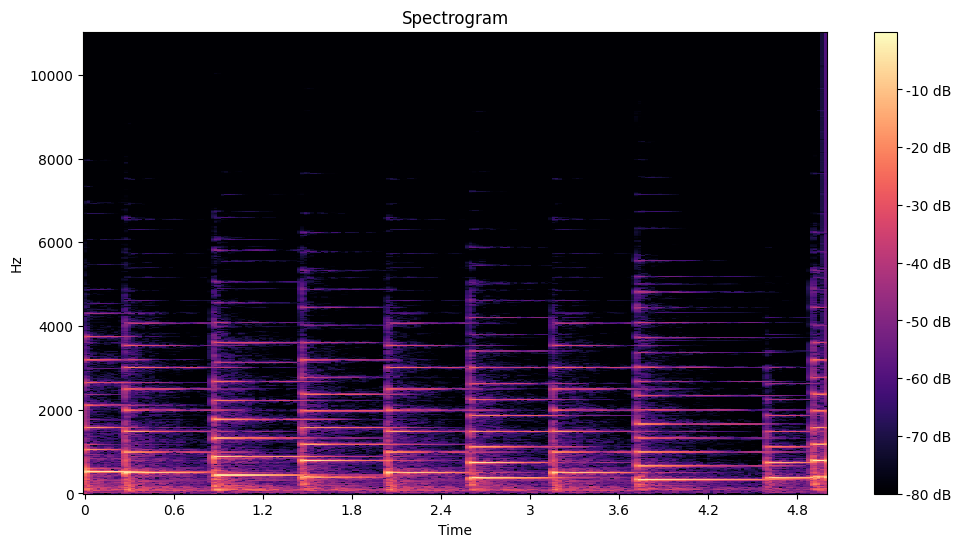

In [9]:
# Your code here
spectrogram = librosa.stft(samples)
spectrogram_data = librosa.amplitude_to_db(abs(spectrogram), ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_data, x_axis='time', y_axis='hz', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

---
A spectrogram represents the time-frequency domain of an audio signal. It shows how the frequency content of the signal varies over time. The x-axis represents time, and the y-axis represents frequency. The color or intensity at each point in the spectrogram represents the amplitude or energy of the corresponding frequency component at that specific time.

Spectrograms are useful for various audio analysis tasks, such as:

    1.Identifying patterns and structures:
  Spectrograms can reveal harmonic structures, transients, and other patterns in the audio signal, which can be useful for audio classification, music analysis, and speech recognition.
    
    2.Sound visualization:
  Spectrograms provide a visual representation of audio signals, allowing for better understanding and interpretation of the audio content.
    
    3.Audio editing and processing:
  Spectrograms can be used as a guide for audio editing tasks, such as noise removal, pitch correction, or time-stretching, by identifying and manipulating specific frequency components or time regions.
    
    4.Audio fingerprinting and retrieval:
  Spectrograms can be used to generate audio fingerprints, which can be useful for audio identification, music recommendation systems, and audio similarity analysis.

By analyzing the patterns and structures in the spectrogram, one can gain insights into the audio signal's characteristics, such as harmonic content, transients, pitch contours, and time-frequency evolution, which can be valuable for various audio processing and analysis tasks.

---


3.   Transform signal to the frequency domain with FFT and study the distribution of pitches (frequencies).
Observe that the melody contains only a couple of distinct sounds, but there are a lot more spikes in the frequency domain.

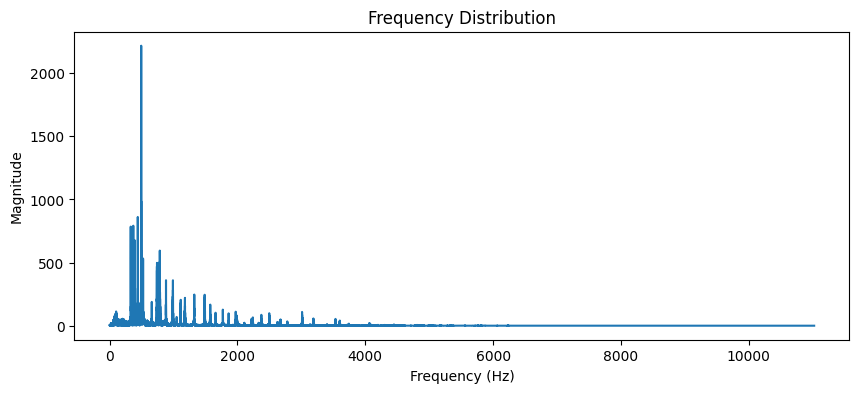

In [17]:
# Your code here
fft = np.fft.fft(samples)
frequencies = np.fft.fftfreq(len(samples), 1 / sampling_rate)

# Plot the frequency distribution
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft)[:len(fft)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Distribution')
plt.show()

4. Apply averaging to the initial signal. Averaging is a procedure that reduces number of samples by taking mean of each n of our samples. Experiment with n and determine whichever will work best to both reduce the noise and not loose any information. You can propose other ways to efficiently denoise the signal.

Averaging with n = 7, new sampling rate = 3150 Hz


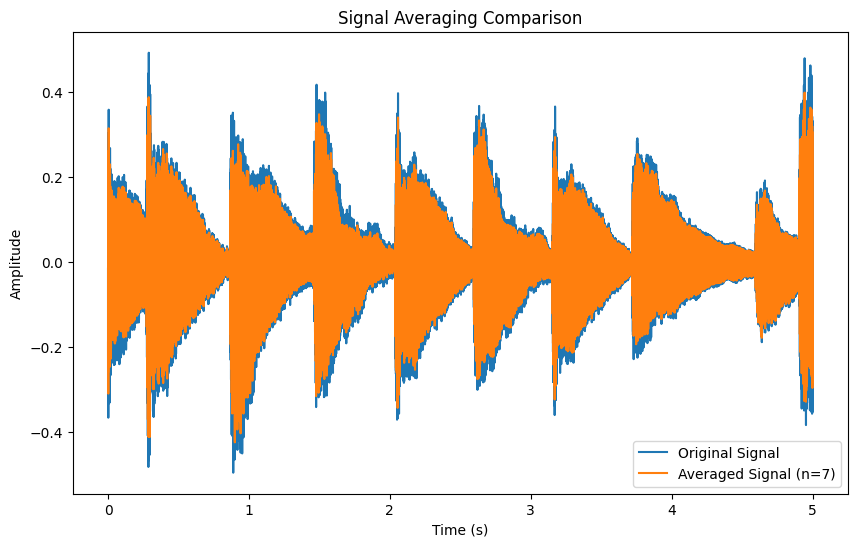

In [12]:
def apply_averaging(signal, n):
    """
    Apply averaging to the signal by taking the mean of every n samples.
    """
    if n == 1:
        return signal

    num_samples = len(signal)
    num_chunks = num_samples // n

    chunks = np.reshape(signal[:num_chunks * n], (-1, n))
    averaged_signal = np.mean(chunks, axis=1)

    return averaged_signal

# Experiment with different values of n
n_values = [7]

time_axis = np.arange(len(samples)) / sampling_rate

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_axis, samples, label='Original Signal')

for n in n_values:
    averaged_signal = apply_averaging(samples, n)
    new_sr = sampling_rate // n
    averaged_time_axis = np.arange(len(averaged_signal)) / new_sr

    print(f"Averaging with n = {n}, new sampling rate = {new_sr} Hz")

    ax.plot(averaged_time_axis, averaged_signal, label=f'Averaged Signal (n={n})')

ax.set_title('Signal Averaging Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

In [13]:
 Audio(averaged_signal, rate=new_sr)

---
By experimenting with different values of n, you can observe the trade-off between noise reduction and signal preservation. Larger values of n will result in more averaging and potentially greater noise reduction, but they may also smooth out important signal features or introduce distortion.

---


5. Match fundamental pitches you discovered to the standard note frequencies and display them in a table like the one outlined below.

|Detected frequency(Hz) | Assigned frequency(Hz) | Output note|   
|:---------------------:|:----------------------:|:----------:|
|393.2 |391.9| G4  

In [14]:
def mostFrequentFreqs(fft_y, fft_x, n, min_diff):
    max_indices = []
    max_values = []
    remaining_indices = list(range(len(fft_y)))
    sorted_indices = sorted(remaining_indices, key=lambda i: fft_y[i], reverse=True)

    for i in sorted_indices:
        if len(max_indices) >= n:
            break
        if not max_indices or all(abs(fft_x[i] - fft_x[j]) >= min_diff for j in max_indices):
            max_indices.append(i)
            max_values.append(fft_x[i])

    return max_values[:n]

fft = np.fft.fft(samples)
frequencies = np.fft.fftfreq(len(samples), 1 / sampling_rate)

m = 12
diff = 20
my_notes = mostFrequentFreqs(np.abs(fft[:len(fft) // 2 + 1]), frequencies[:len(frequencies) // 2 + 1], m, diff)
print("{:<25} {:<25} {:<12}".format("Detected frequency(Hz)", "Assigned frequency(Hz)", "Output note"))
print("{:<25} {:<25} {:<12}".format("-"*25, "-"*25, "-"*12))

for noteFreq in my_notes:
    note = librosa.hz_to_note(noteFreq)
    assigned_freq = round(librosa.note_to_hz(note), 2)
    print("{:<25.2f} {:<25.2f} {:<12}".format(noteFreq, assigned_freq, note))

Detected frequency(Hz)    Assigned frequency(Hz)    Output note 
------------------------- ------------------------- ------------
494.20                    493.88                    B4          
440.40                    440.00                    A4          
370.20                    369.99                    F♯4         
330.20                    329.63                    E4          
391.80                    392.00                    G4          
785.00                    783.99                    G5          
523.00                    523.25                    C5          
741.40                    739.99                    F♯5         
882.20                    880.00                    A5          
990.60                    987.77                    B5          
1324.80                   1318.51                   E6          
1486.80                   1479.98                   F♯6         


In the last task you will use the recording of Lynyrd Skynyrd - Free Bird.

6.    Experiment with filtering of free_bird.mp3 using Butterworth filter (or other ways which you prefer), so that only bass could be heard. (Hint: you can use [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)). Replay original and filtered audios. Plot their time and frequency domains.

In [15]:
from scipy.signal import butter, lfilter

free_bird_path = "free_bird.mp3"
y, sr = librosa.load(free_bird_path)

max_freq = 250
order = 10

norm_freq = 2 * max_freq / sr

x, z = butter(order, norm_freq, btype = 'Low', analog=False)
filtered_data = lfilter(x, z, y)
Audio(filtered_data, rate=sr)


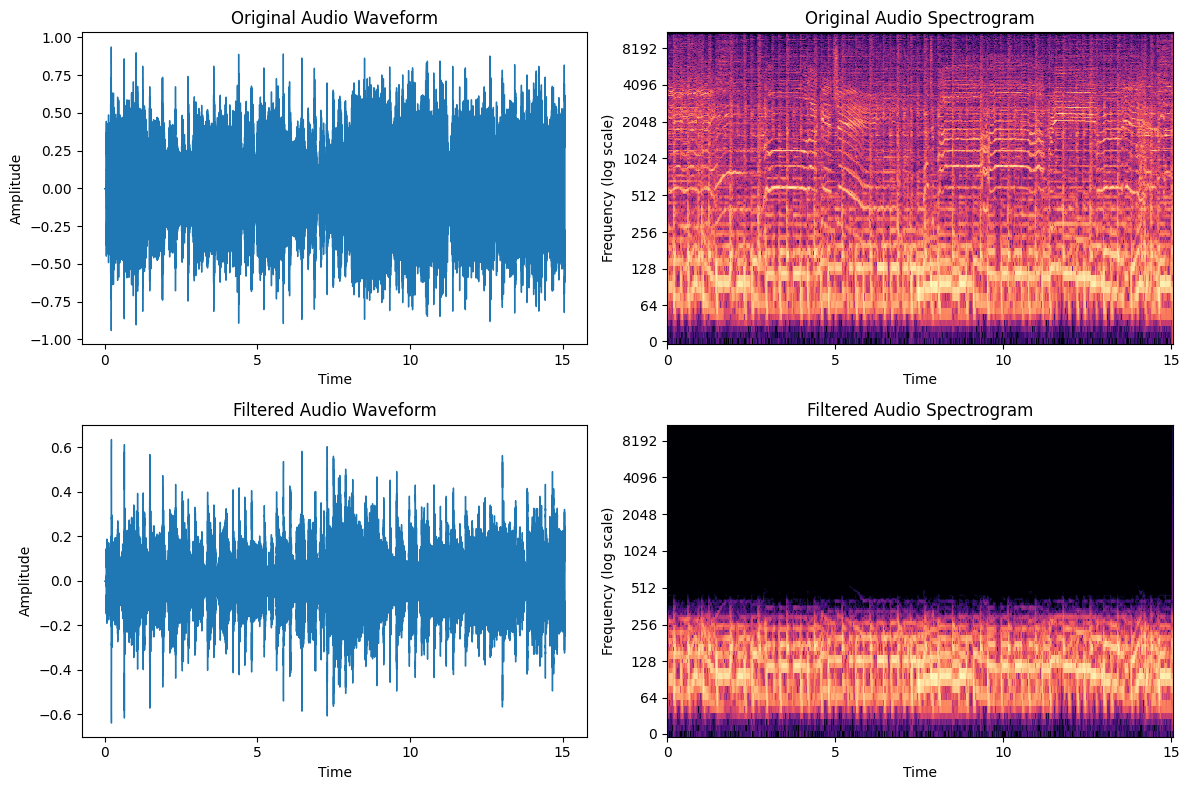

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.title('Original Audio Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (log scale)')

plt.subplot(2, 2, 3)
librosa.display.waveshow(filtered_data, sr=sr)
plt.title('Filtered Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
D = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_data)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.title('Filtered Audio Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

---
By applying a low-pass Butterworth filter with a cutoff frequency of 250 Hz, the higher frequencies above the bass range are removed from the original audio signal. This allows you to hear only the bass frequencies when playing the filtered audio.

The waveforms and spectrograms provide visual representations of the original and filtered audio signals in both the time and frequency domains. The waveforms show the amplitude variations over time, while the spectrograms show the frequency content and how it changes over time. By comparing the spectrograms of the original and filtered audio, you can observe how the higher frequencies have been removed, leaving only the low-frequency bass components.

This approach can be useful for various audio processing tasks, such as isolating specific frequency ranges, removing unwanted noise or frequencies, or enhancing specific components of an audio signal.

---


## Summary

1. What is Fourier transform? How can it be used in signal processing?
---

The Fourier Transform is a tool that breaks a waveform (a function or signal) into an alternate representation, characterized by the sine and cosine functions of varying frequencies. The Fourier Transform shows that any waveform can be re-written as the sum of sinusoidals.

The continuous Fourier Transform (FT) of a function f(t) is defined as:

$$F(w)=\int_{-\infty}^{\infty} f(t) \exp^{-iwt}\,dx $$
Where:


$F(w)$ is the Fourier Transform of the function $f(t)$ with respect to frequency w

$f(t)$  is the original function in the time domain.

$\exp^{-iwt}$ is the complex exponential function.

The integral is taken over all time.

Typical use of Fourier transform is to decompose the signal into amplitude and phase components. Also it allows you to analyze the frequency content of a signal, identifying dominant frequencies, harmonics, and noise. By transforming a signal into the frequency domain, we can apply filters to remove unwanted frequency components or enhance desired ones.
Multiplication in the frequency domain corresponds to convolution in the time domain, enabling efficient computation of convolutions.

---

2. What are time and frequency domains and how can they be useful?
---

**Time domain:**

A time domain analysis is an analysis of physical signals in reference to time.

In the time domain, signals are represented as amplitude varying with time.
Time-domain analysis focuses on how signals change over time, showing variations such as amplitude, phase, and frequency at different points in time. It is useful for understanding the behavior of signals over time, including transient events, signal duration, and temporal relationships between different parts of the signal.


**Frequency Domain:**

In the frequency domain, signals are represented as a combination of sinusoidal components of different frequencies.
Frequency-domain analysis involves decomposing signals into their frequency components using techniques such as Fourier analysis. It is useful for understanding the spectral characteristics of signals, including their frequency content, harmonic components, and frequency response.





***A time-domain graph can show how a signal changes with time, whereas a frequency-domain graph will show how much of the signal lies within each given frequency band over a range of frequencies.***

In general, when an analysis uses a unit of time, such as seconds or one of its multiples (minutes or hours) as a unit of measurement, then it is in the time domain. However, whenever an analysis concerns the units like Hertz, then it is in the frequency domain.

---

3. What is averaging and what is its purpose?

---

Averaging in signal processing is a pivotal technique for enhancing signal clarity by suppressing noise, enabling engineers to extract meaningful information from noisy datasets.

Averaging is **used to improve the quality**, reliability, and interpretability of signals **by reducing noise**, enhancing signal features, and providing a more accurate representation of the underlying data.

---